___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [5]:
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [6]:
ad_data.tail(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


**Use info and describe() on ad_data**

In [7]:
ad_data.info()
# Ad Topic line, City, Country and Timestamp are strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
type(ad_data['Timestamp'][1])

str

In [10]:
type(ad_data['Ad Topic Line'][1])

str

In [11]:
type(ad_data['Country'][1])

str

In [12]:
type(ad_data['City'][1])

str

In [13]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


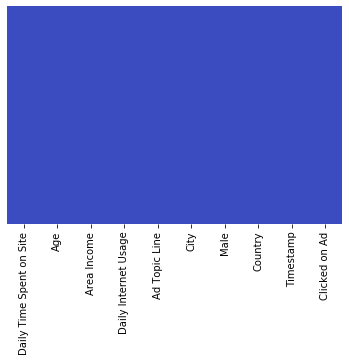

In [14]:
sns.heatmap(ad_data.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')
# No Null Values

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

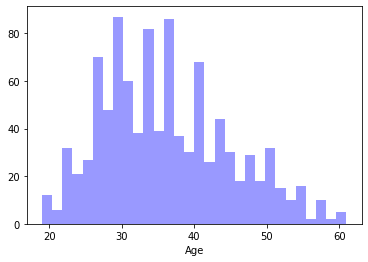

In [18]:
sns.distplot(ad_data['Age'], bins=30, kde=False, color='blue')
# Left skew, younder audience

**Create a jointplot showing Area Income versus Age.**

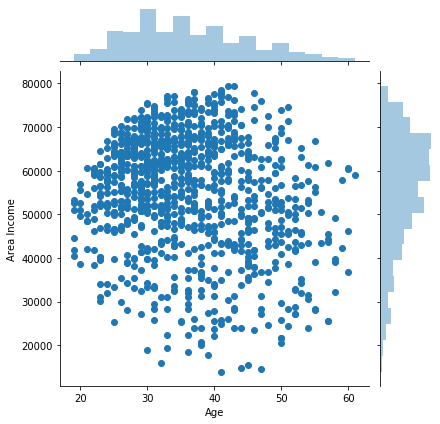

In [20]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)
# Lots of young people with high income, get older = more income, then retire

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

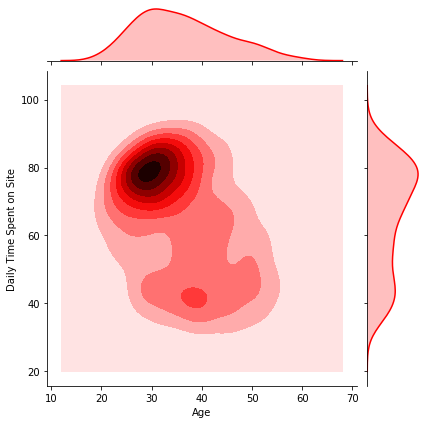

In [25]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')
# Younger people spend more time

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

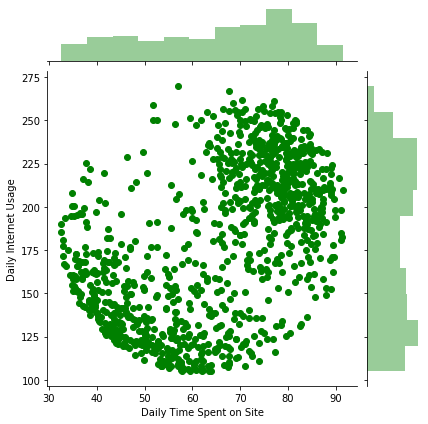

In [28]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')
# Almost bimodal, 2 clusters, not normally distributed

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

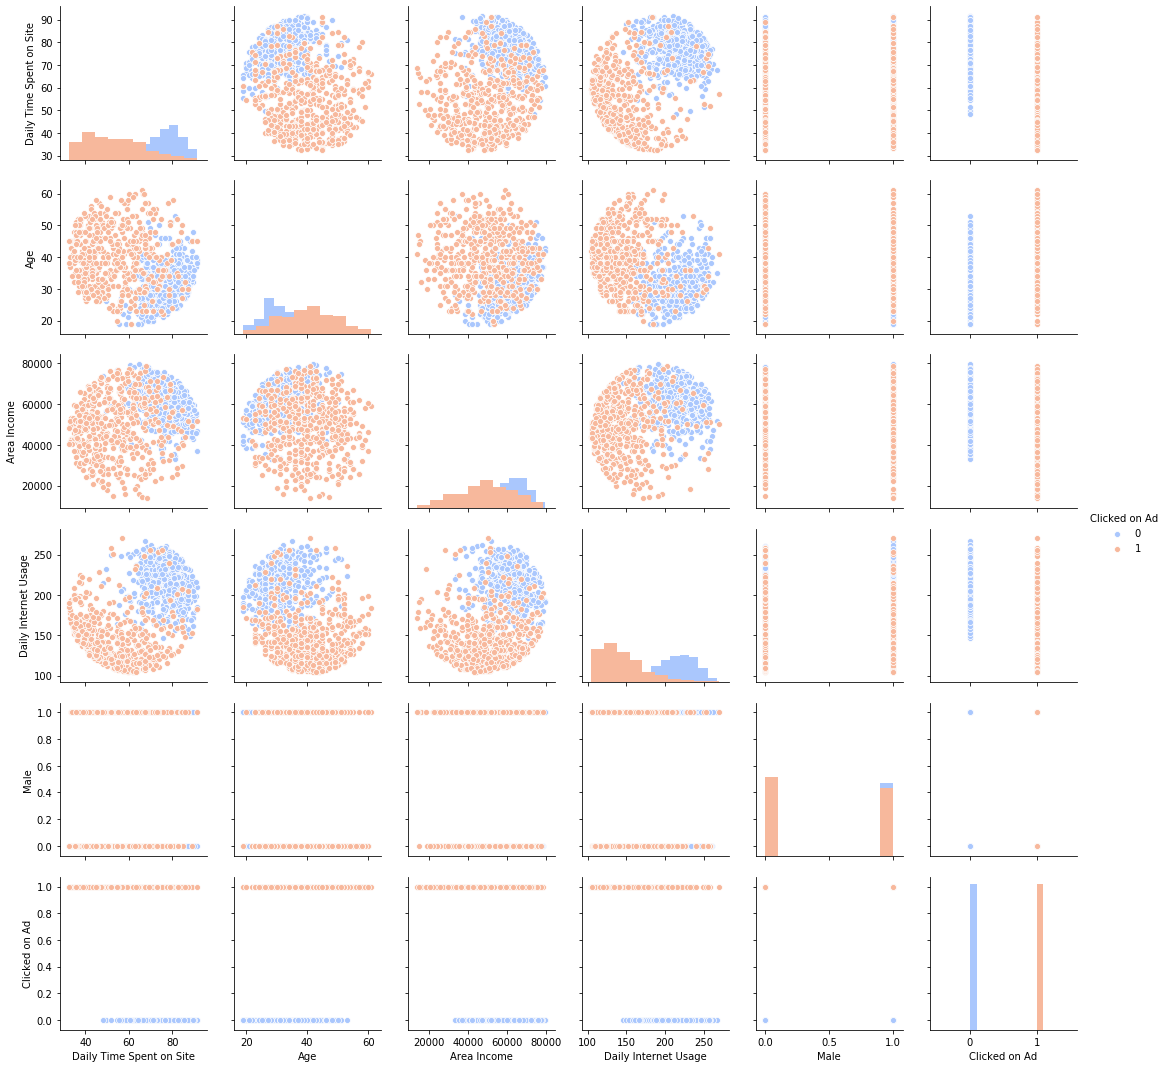

In [34]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='coolwarm', diag_kind='hist')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [35]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**Split the data into training set and testing set using train_test_split**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Drop string columns Ad Topic Line, City, Country and Timestamp are strings
# Drop clicked on add column
#X = ad_data.drop(['City','Country','Timestamp', 'Ad Topic Line', 'Clicked on Ad'], axis=1)
# or select only relevant columns
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [38]:
X.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1


In [39]:
y = ad_data['Clicked on Ad']

In [40]:
y.head(2)

0    0
1    0
Name: Clicked on Ad, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [42]:
from sklearn.linear_model import LogisticRegression

In [45]:
# create instance of LogisticRegression
logmodel = LogisticRegression(solver='liblinear', multi_class='ovr') # default solver='warn', default multi_class='warn'
# more param available to fine tune

In [46]:
# Train (fit) the model
logmodel.fit(X_train, y_train) # outputs default values that can be fine tunded in cell above

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
print(predictions[0:10])

[1 0 0 1 0 1 1 1 1 1]


**Create a classification report for the model.**

In [49]:
from sklearn.metrics import classification_report
# SKlearn builtin classification_report will give precision,recall,f1-score

In [50]:
print(classification_report(y_test, predictions))
# returns precision, recall, F1-score for each class and avg total
# 92% accurate, in the ninties for precsion and recall, F1-score

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [51]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [52]:
print(confusion_matrix(y_test, predictions))
# TN, FN
# FP, TP

[[149   8]
 [ 15 128]]


## Great Job!